Henry Ho 304723723

Justin Sarenas 304675389

# Question1: Handwriting Recognition:

## a- Download the dataset "Digit" and the corresponding csv file. Import libraries.

In [1]:
# Import libraries to work with images:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Allows images to be shown inside Jupyter explorer page
%matplotlib inline

# Importing Pandas library
import pandas as pd

# Importing numpy library
import numpy as np

### Download the dataset "Digit" and appending them into a list and a flattened list

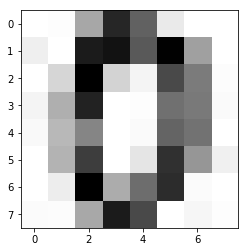

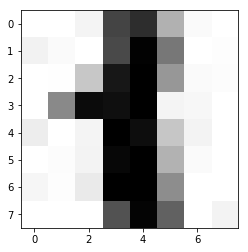

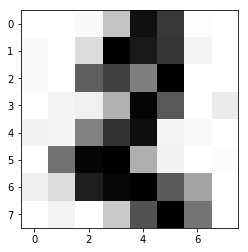

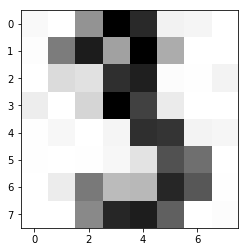

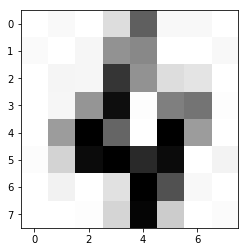

In [2]:
# Load images
digits = []
flat_digits = []
dataset_size = 1797
file_name = 0

while file_name < dataset_size:
    digits.append(mpimg.imread('Datasets/Digit/' + str(file_name) + '.jpg'))
    
    # Flatten list with numpy
    flat_digits.append(np.array(digits[file_name]).flatten())
    
    file_name += 1

    
for i in list(range(5)):
    plt.figure()
    plt.imshow(digits[i], cmap=plt.cm.gray_r, interpolation='nearest')

In [3]:
print(digits[0])

print('\nFlattened array:')
print(flat_digits[0])

[[  0   2  88 217 158  21   0   0]
 [ 16   0 228 236 166 253  95   0]
 [  0  41 255  44  11 182 132   3]
 [ 11  80 220   0   2 143 133   5]
 [  6  71 122   0   5 155 140   0]
 [  0  76 194   0  26 207 105  15]
 [  0  18 255  83 146 211   4   0]
 [  4   3  87 228 182   0   9   2]]

Flattened array:
[  0   2  88 217 158  21   0   0  16   0 228 236 166 253  95   0   0  41
 255  44  11 182 132   3  11  80 220   0   2 143 133   5   6  71 122   0
   5 155 140   0   0  76 194   0  26 207 105  15   0  18 255  83 146 211
   4   0   4   3  87 228 182   0   9   2]


## b- Build the feature matrix and label vector: Each image is considered as a data sample with pixels as features. Thus, to build the feature table you have to convert each 8x8 image into a row of the feature matrix with 64 feature columns for 64 pixels.

In [4]:
# Creating an empty dataframe
digit_df = pd.DataFrame()

# Inserting flattened list into the dataframe
# Has 64 columns, one column per pixel
digit_df = pd.DataFrame(flat_digits)

print(digit_df)

      0   1    2    3    4    5    6   7   8    9  ...   54  55  56  57   58  \
0      0   2   88  217  158   21    0   0  16    0 ...    4   0   4   3   87   
1      0   0   11  187  210   78    5   0  13    5 ...    0   0   0   0    0   
2      0   0    5   59  240  199    2   0   5    0 ...   92   0   0  11    0   
3      6   0  108  255  213   13   10   0   2  131 ...  168   1   0   0  118   
4      0   6    0   34  160    7    7   0   5    0 ...    7   0   0   0    2   
5     15   0  200  149    2    0   13   0   0   11 ...   69   0   7   0  143   
6      0  13    0  192  210    0   10   0   8    0 ...  134   3   0   0   11   
7     10   0  114  133  203  255  235  16   0   13 ...    0   0   1   0  225   
8      0   7  145  223  128   13    0   2   0    0 ...  133   0   0   3  169   
9      0   0  174  199    5    0    0   8  10   23 ...   90   1   0   3  145   
10     0  11    8  139  235  177    4   0   0    2 ...    0   0  19   0    9   
11     4   2    0    0  227  207   16   

### Append the labels into the dataframe

In [5]:
# Append the labels to the dataframe
digit_df = digit_df.join(pd.read_csv('https://raw.githubusercontent.com/ellipsclamation/cs4661_data_science/master/Datasets/label.csv'))

digit_df.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,name of the file,digit
0,0,2,88,217,158,21,0,0,16,0,...,4,3,87,228,182,0,9,2,0,0
1,0,0,11,187,210,78,5,0,13,5,...,0,0,0,172,251,157,0,12,1,1
2,0,0,5,59,240,199,2,0,5,0,...,0,11,0,54,173,255,138,0,2,2
3,6,0,108,255,213,13,10,0,2,131,...,0,0,118,217,226,159,0,3,3,3
4,0,6,0,34,160,7,7,0,5,0,...,0,0,2,42,250,51,0,4,4,4


### Building the feature matrix and label vector

In [6]:
# Create a python list of feature which is the first 64 columns
feature_cols = list(range(64))
print(feature_cols)

# Use the above list to select the features from the original DataFrame
X = digit_df[feature_cols]

# Print the first 5 rows
X.head()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,2,88,217,158,21,0,0,16,0,...,4,0,4,3,87,228,182,0,9,2
1,0,0,11,187,210,78,5,0,13,5,...,0,0,0,0,0,172,251,157,0,12
2,0,0,5,59,240,199,2,0,5,0,...,92,0,0,11,0,54,173,255,138,0
3,6,0,108,255,213,13,10,0,2,131,...,168,1,0,0,118,217,226,159,0,3
4,0,6,0,34,160,7,7,0,5,0,...,7,0,0,0,2,42,250,51,0,4


In [7]:
# checking the size of Feature Matrix X:
print(X.shape)

(1797, 64)


In [8]:
# select a Series of labels (the last column) from the DataFrame
y = digit_df['digit']

# checking the label vector by printing every 2 values
y[::2]

0       0
2       2
4       4
6       6
8       8
10      0
12      2
14      4
16      6
18      8
20      0
22      2
24      4
26      6
28      8
30      0
32      5
34      6
36      0
38      8
40      8
42      1
44      7
46      5
48      0
50      2
52      7
54      2
56      1
58      6
       ..
1738    5
1740    9
1742    2
1744    2
1746    0
1748    7
1750    3
1752    1
1754    4
1756    3
1758    3
1760    1
1762    6
1764    4
1766    1
1768    0
1770    3
1772    9
1774    1
1776    5
1778    4
1780    2
1782    2
1784    5
1786    9
1788    4
1790    8
1792    9
1794    8
1796    8
Name: digit, Length: 899, dtype: int64

## c- Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.1, random_state=2

In [9]:
# Picks 10% of data samples for testing set and 90% for training set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

print(X_test)
print('\n')
print(y_test)

      0   1    2    3    4    5    6   7   8    9  ...    54   55  56  57  \
154    0   0    6   49  255   45    0   5   4    2 ...     1    0  15   0   
564    0  14    8  251  167    5   16   0  15    0 ...    32    8   3   0   
1444   1   3  127  209  229   63    2   7   0   87 ...    99    2   0   0   
1394   0   2   31  255  200   10    0   0  12    0 ...     0    8   6   0   
1660   3   0  167  122    0   19    0   6   0   77 ...     0   11   0   0   
1368   0  18  192  255  255  232    2   0   1  109 ...     0    0   7   0   
1436   0   6    0    0  179  232   32   0  14    0 ...    72    2   3   2   
1420   5  10  196  182  192  231   95   0   0    0 ...     0   15   6  22   
1334   5   0   12  216  178   13    0   0   1    6 ...     5    0   0  17   
581    4   0   13  158  250  102    0  10   0    0 ...    33    8   0  20   
1449   0  14    0  138  245   16    0   5  16    0 ...   139    0   0   1   
240    0   9  107  241  107    0    0   2   1    0 ...     5    4   9   0   

## d- Use scikit-learn "Random Forest" classifier to recognize the hand-written digits based on the training/testing datasets that you built in part (c). Test your Machine Learning Algorithm on testing set, and calculate and report the accuracy.

### Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators=19, bootstrap=True, random_state=2)

### Use my_RandomForest.fit for training and my_RandomForest.predict for prediction.

In [11]:
# Training only on the training set using the method "fit" 
# of the object along with training dataset and labels to train the model.
my_RandomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [12]:
# Testing on the testing set:
y_predict= my_RandomForest.predict(X_test)

print(y_predict)

[4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 7 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 1 5 7 5 4 9 6 1 7 0 1 9 7 3 3 1 1 8 8 9 8 5 7 4 7 2 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 1 5 0 3 9 2 7 3 2 0 8 1 9 2 1 5 1 0 3 4 3 0 7 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 5 7 4 8 9 5 7 6 9 4 0 4 0 0 4]


### Random Forest Accuracy Evaluation:

In [13]:
from sklearn.metrics import accuracy_score

accuracy= accuracy_score(y_test, y_predict)

print(accuracy)

0.927777777778


## e- Find exactly which one of the data samples have been misclassified in your testing set.

In [14]:
y_test = np.asarray(y_test)
misclassified = np.where(y_test != y_predict)[0]
print(misclassified)

[  4  16  41  44  45  49  63  66 115 130 137 165 174]


### Showing misclassified images:

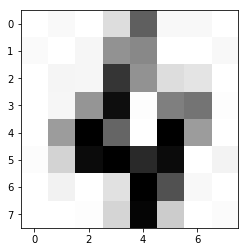

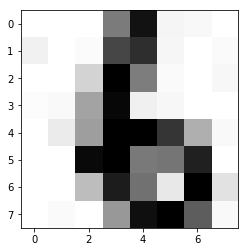

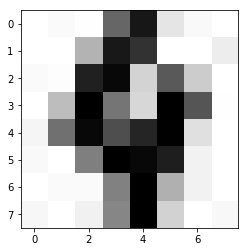

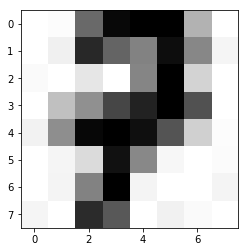

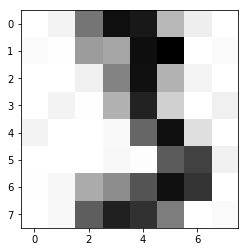

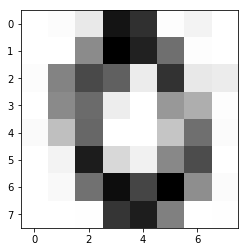

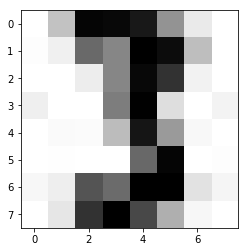

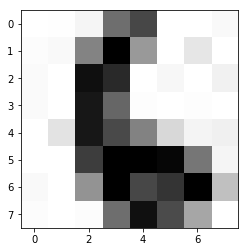

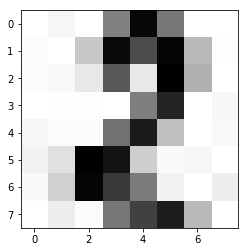

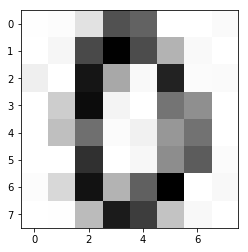

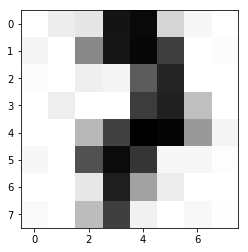

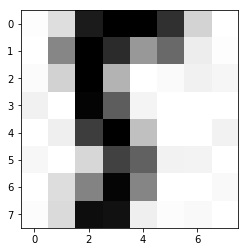

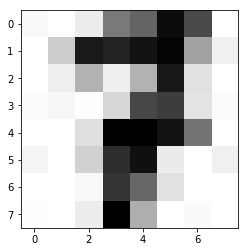

In [15]:
for x in misclassified:
    plt.figure()
    plt.imshow(digits[x], cmap=plt.cm.gray_r, interpolation='nearest')